In [18]:
import os
import re
import pandas as pd
import numpy as np
 
chat_file = 'chat.txt'
 
# Read watsup file
if os.path.exists(chat_file):
        file_data = open(chat_file,'r', encoding="utf8")
        chat_content = file_data.read()
 
# Get date
date_regex=re.compile(r'(\d+/\d+/\d+)')
date=date_regex.findall(chat_content)
 
# Get time
time_regex=re.compile(r'(24:00|2[0-3]:[0-5][0-9]|[0-1][0-9]:[0-5][0-9])')
time=time_regex.findall(chat_content)
 
# Get Users
user_regex=re.compile(r'-(.*?):')
user=user_regex.findall(chat_content)
 
# Get Message
message_regex=re.compile(r"(\n)(?<=)(\d+/\d+/\d+)(.*)")
message=message_regex.findall(chat_content)
 
data=[]
for w,x,y,z in zip(date,time,user,message):
    data.append([str(w),str(x),str(y),str(z)])
    
# Create DataFrame of the watsup content
chat=pd.DataFrame(data,columns=("Date","Time","User","Message"))
 
# Let's clean our Message
chat['Message']=chat['Message'].str.replace('\'(.*?): ','')
 
# Get Year from Date
chat['Date'] = pd.to_datetime(chat['Date'])
chat['Year']=chat['Date'].dt.year
 
# Get Month from Date
chat['Month']=chat['Date'].dt.month
 
# Get Day from Date
chat['Day']=chat['Date'].dt.day
 
# Get Hours of the Day
chat['Time'] = pd.to_datetime(chat['Time'])
chat['Hours']=chat.Time.apply(lambda x: x.hour)
 
# Message words
chat['Words'] = chat['Message'].str.strip().str.split('[\W_]+')
 
# Word length
chat['Word Length'] = chat['Words'].apply(len)-2
 
# Get the Length of Message
chat['Message Characters'] = chat['Message'].map(str).apply(len)-3
 
# Get Media in the Message
chat['Media']=chat['Message'].str.contains('<Media omitted>')



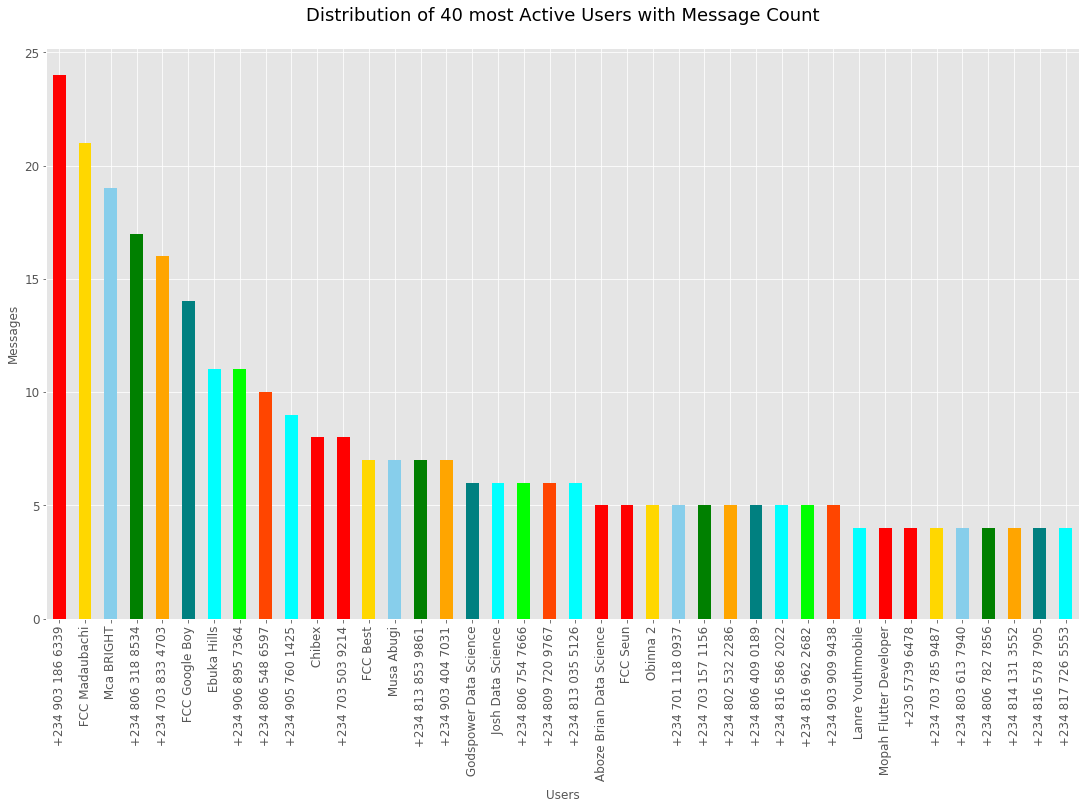

In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
# fig.savefig('test2png.png', dpi=100))
# figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
plt.style.use('ggplot')

users=chat.groupby('User')['User'].count().nlargest(40)

def bar_chart(users):
    ax = users.plot(kind='bar', color = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12)
    ax.set_title("Distribution of 40 most Active Users with Message Count\n", fontsize=18)
    ax.set_xlabel("Users", fontsize=12)
    ax.set_ylabel("Messages", fontsize=12)
    fig.savefig('Distribution of users & mesage count3.png', dpi=100)
    plt.show()
    fig.savefig('Distribution of users & mesage count4.png', dpi=100)
#     plt.savefig('Distribution of users & mesage count.png', bbox_inches='tight')

bar_chart(users)

In [20]:
chat.head()

,Date,Time,User,Message,Year,Month,Day,Hours,Words,Word Length,Message Characters,Media
0,2019-01-18,2019-02-28 16:26:00,‪+234 903 186 6339‬,(Our bosses might decide to get us fried chick...,2019,1,18,16,"[, Our, bosses, might, decide, to, get, us, fr...",9,47,False
1,2019-01-18,2019-02-28 19:58:00,FCC Madaubachi,(😹😹'),2019,1,18,19,"[, ]",0,2,False
2,2019-01-18,2019-02-28 20:15:00,‪+234 905 871 8256‬,(Chief'),2019,1,18,20,"[, Chief, ]",1,5,False
3,2019-01-18,2019-02-28 20:50:00,‪+234 903 186 6339‬,(Is anyone coming with an Ubuntu bootable disk?'),2019,1,18,20,"[, Is, anyone, coming, with, an, Ubuntu, boota...",8,46,False
4,2019-01-19,2019-02-28 09:20:00,‪+234 816 586 2022‬,(If u have a flash u can take a copy'),2019,1,19,9,"[, If, u, have, a, flash, u, can, take, a, cop...",10,35,False


In [21]:
chat['User'].count

<bound method Series.count of 0              ‪+234 903 186 6339‬
1                   FCC Madaubachi
2              ‪+234 905 871 8256‬
3              ‪+234 903 186 6339‬
4              ‪+234 816 586 2022‬
5                   FCC Madaubachi
6                   FCC Madaubachi
7              Razak Developer IOM
8                   FCC Madaubachi
9                   FCC Madaubachi
10                  FCC Madaubachi
11             ‪+234 813 899 8844‬
12                  FCC Madaubachi
13             ‪+234 813 899 8844‬
14             ‪+234 816 586 2022‬
15                        FCC Best
16      John ToChukwu Eze Okafor 2
17             ‪+234 701 118 0937‬
18             ‪+234 813 899 8844‬
19             Razak Developer IOM
20                  FCC Madaubachi
21             ‪+234 816 586 2022‬
22                  FCC Madaubachi
23                  FCC Madaubachi
24             ‪+234 816 586 2022‬
25                        Obinna 2
26         Mopah Flutter Developer
27                       

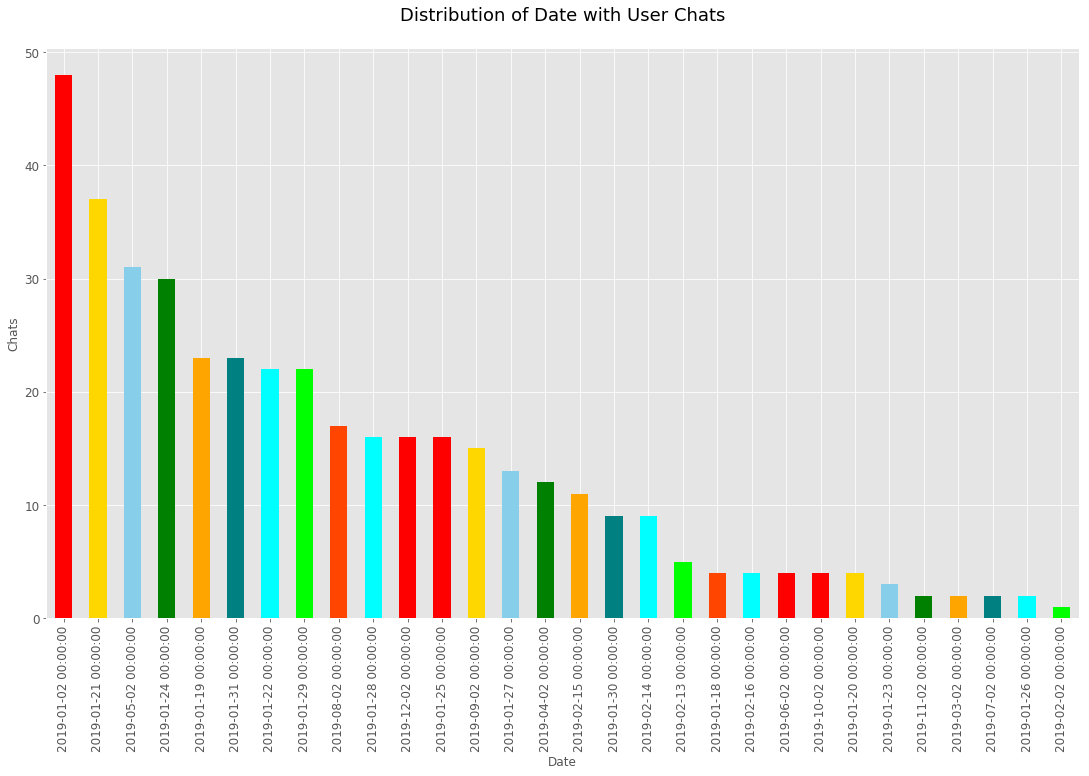

In [22]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.style.use('ggplot')
 
days=chat.groupby('Date')['Date'].count().nlargest(40)
def date_users_bar_chart(date):
    ax = date.plot(kind='bar', color = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12)
    ax.set_title("Distribution of Date with User Chats\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    fig.savefig('Distribution of Date with users  Chats.png', dpi=100)
    plt.show()
    fig.savefig('Distribution of Date with users  Chats.png', dpi=100)
 
days_count=days[0:]
date_users_bar_chart(days_count)

<Figure size 1332x756 with 0 Axes>

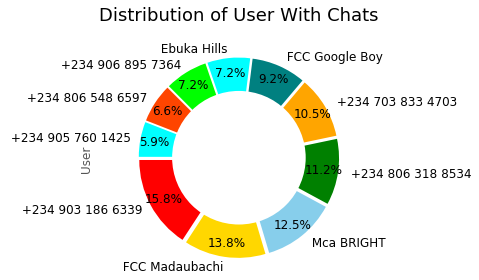

In [23]:

plt.style.use('ggplot')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.style.use('ggplot')
 
user=chat.groupby('User')['User'].count().nlargest(10)
 
def user_chat_pie(user):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(user)):
        explodex.append(0.05)
    ax = user.plot(kind='pie', colors = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    inner_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(inner_circle)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Chats\n", fontsize=18)
    plt.tight_layout()
    fig.savefig('Distribution of User with Chats.png', dpi=100)
    plt.show()
    fig.savefig('Distribution of User with Chats.png', dpi=100)
 
user_chat_pie(user)

<Figure size 1332x756 with 0 Axes>

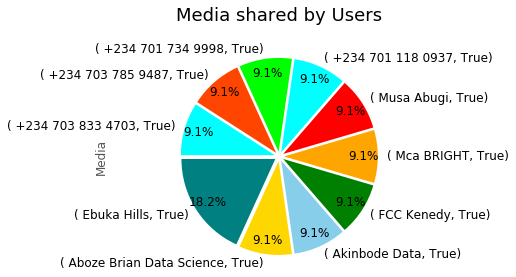

In [24]:
plt.style.use('ggplot')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
 
media_chat=chat[chat['Media']==True]
media_per_user_group=media_chat.groupby(['User','Media'])['Media'].count().nlargest(10)
 
def media_shared_pie(media_per_user_group):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(media_per_user_group)):
        explodex.append(0.05)
    ax = media_per_user_group.plot(kind='pie', colors = ['teal','gold','skyblue','green','orange','red','cyan','lime','orangered','aqua'], fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85,explode=explodex)
    ax.axis('equal')  
    ax.set_title("Media shared by Users\n", fontsize=18)
    fig.savefig('Media shared by users.png', dpi=100)
    plt.show()
 
media_shared_pie(media_per_user_group)

<Figure size 1332x756 with 0 Axes>

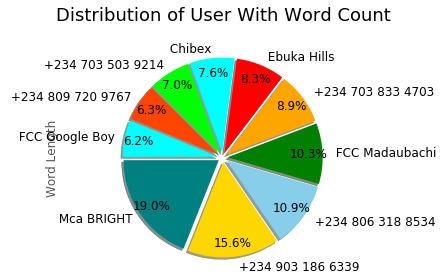

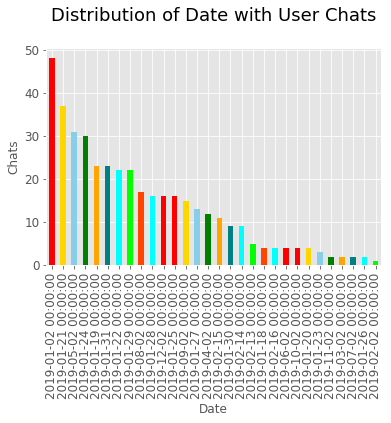

In [25]:
plt.style.use('ggplot')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
 
plt.style.use('ggplot')
 
word_count=chat.groupby(['User'])['Word Length'].sum().nlargest(10)
 
def pie_chart(word_count):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(word_count)):
        explodex.append(0.05)
    ax = word_count.plot(kind='pie', colors = ['teal','gold','skyblue','green','orange','red','cyan','lime','orangered','aqua'],shadow=True, fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Word Count\n", fontsize=18)
    plt.tight_layout()
    fig.savefig('Distribution of User With Word Count.png', dpi=100)
    plt.show()
 
pie_chart(word_count)
word_count=days[0:]
date_users_bar_chart(days_count)

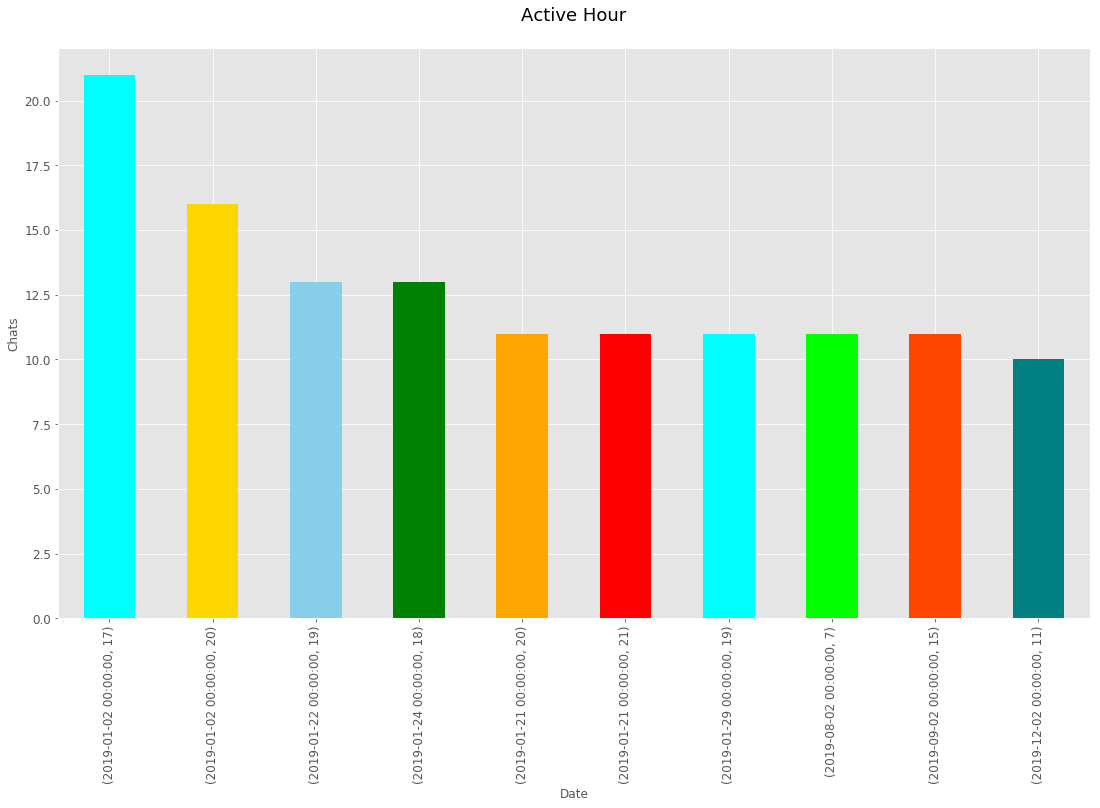

In [26]:
plt.style.use('ggplot')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
 
active_hour=chat.groupby(['Date','Hours'])['Hours'].count().nlargest(10)
 
def active_hours_bar_chart(active_hour):
    ax = active_hour.plot(kind='bar', color = ['aqua','gold','skyblue','green','orange','red','cyan','lime','orangered','teal'], fontsize=12)
    ax.set_title("Active Hour\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    fig.savefig('Active Hour.png', dpi=100)
    plt.show()
 
active_hours_bar_chart(active_hour)

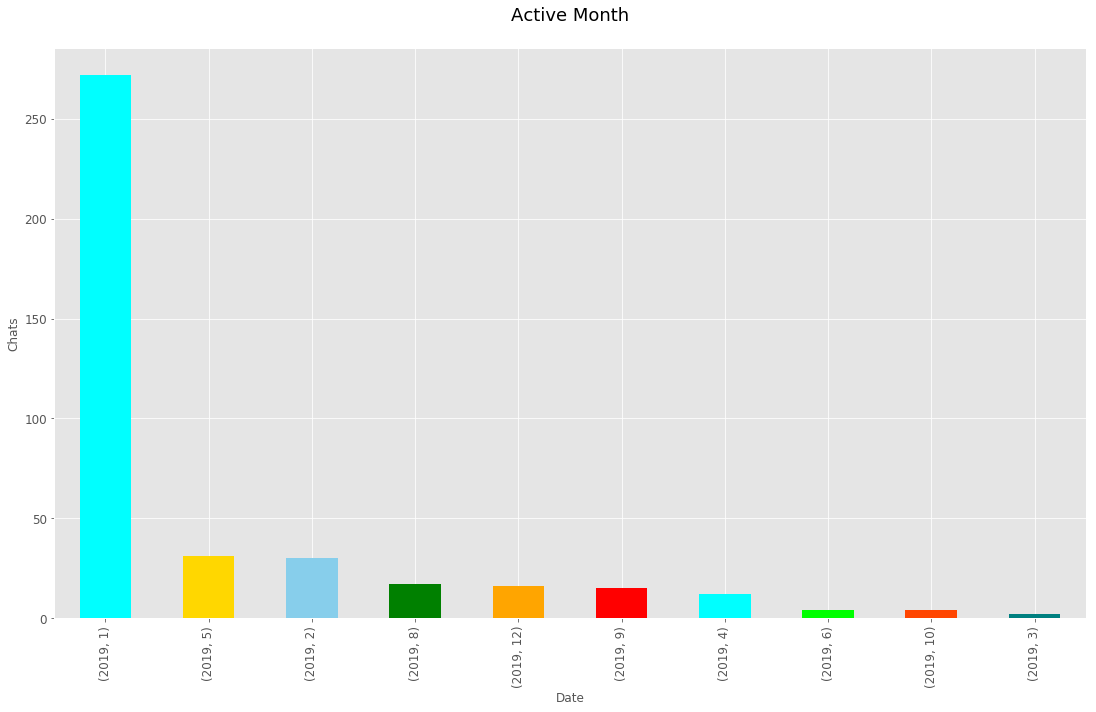

In [17]:
plt.style.use('ggplot')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
 
active_month=chat.groupby(['Year','Month'])['Month'].count().nlargest(10)
 
def active_month_bar_chart(active_month):
    ax = active_month.plot(kind='bar', color = ['aqua','gold','skyblue','green','orange','red','cyan','lime','orangered','teal'], fontsize=12)
    ax.set_title("Active Month\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    fig.savefig('Active Month.png', dpi=100)
    plt.show()
 
active_month_bar_chart(active_month)

# ANALYSIS

In [27]:
chat.head()

,Date,Time,User,Message,Year,Month,Day,Hours,Words,Word Length,Message Characters,Media
0,2019-01-18,2019-02-28 16:26:00,‪+234 903 186 6339‬,(Our bosses might decide to get us fried chick...,2019,1,18,16,"[, Our, bosses, might, decide, to, get, us, fr...",9,47,False
1,2019-01-18,2019-02-28 19:58:00,FCC Madaubachi,(😹😹'),2019,1,18,19,"[, ]",0,2,False
2,2019-01-18,2019-02-28 20:15:00,‪+234 905 871 8256‬,(Chief'),2019,1,18,20,"[, Chief, ]",1,5,False
3,2019-01-18,2019-02-28 20:50:00,‪+234 903 186 6339‬,(Is anyone coming with an Ubuntu bootable disk?'),2019,1,18,20,"[, Is, anyone, coming, with, an, Ubuntu, boota...",8,46,False
4,2019-01-19,2019-02-28 09:20:00,‪+234 816 586 2022‬,(If u have a flash u can take a copy'),2019,1,19,9,"[, If, u, have, a, flash, u, can, take, a, cop...",10,35,False


In [44]:
chat.describe()

,Year,Month,Day,Hours,Word Length,Message Characters
count,407.0,407.000000,407.000000,407.000000,407.000000,407.000000
mean,2019.0,2.712531,15.329238,14.176904,10.609337,56.292383
std,0.0,3.088739,11.118914,5.612983,9.928672,53.839348
min,2019.0,1.000000,2.000000,0.000000,0.000000,1.000000
25%,2019.0,1.000000,2.000000,10.000000,3.000000,15.000000
50%,2019.0,1.000000,19.000000,15.000000,7.000000,36.000000
75%,2019.0,4.000000,24.000000,19.000000,17.000000,90.000000
max,2019.0,12.000000,31.000000,23.000000,63.000000,360.000000


In [46]:
user = chat.groupby('User')['User'].count()

In [47]:
user

User
 A                              3
 Aboze Brian Data Science       5
 Akinbode Data                  3
 Akindayo                       3
 Chibex                         8
 D Sign                         2
 DON Promise                    2
 Ebuka Hills                   11
 FCC Best                       7
 FCC Google Boy                14
 FCC Kenedy                     1
 FCC Madaubachi                21
 FCC Seun                       5
 Godspower Data Science         6
 John ToChukwu Eze Okafor 2     1
 Josh Data Science              6
 Katie Data Science             1
 Lanre Youthmobile              4
 Mca BRIGHT                    19
 Mike Data Science              1
 Mopah Flutter Developer        4
 Musa Abugi                     7
 Obinna 2                       5
 Razak Developer IOM            3
 https                          3
 ‪+230 5739 6478‬               4
 ‪+234 701 118 0937‬            5
 ‪+234 701 734 9998‬            1
 ‪+234 703 157 1156‬            5
 ‪+234 70

In [48]:
#from the above it is seen that +234 903 16 6339 has the highest occurance in the group chat which means
#he or she is the most active member of the group

In [54]:
#our total amount of characters in our message
chat['Message Characters'].sum()

22911

In [59]:
chat.groupby('Date')['Date'].count()

Date
2019-01-02    48
2019-01-18     4
2019-01-19    23
2019-01-20     4
2019-01-21    37
2019-01-22    22
2019-01-23     3
2019-01-24    30
2019-01-25    16
2019-01-26     2
2019-01-27    13
2019-01-28    16
2019-01-29    22
2019-01-30     9
2019-01-31    23
2019-02-02     1
2019-02-13     5
2019-02-14     9
2019-02-15    11
2019-02-16     4
2019-03-02     2
2019-04-02    12
2019-05-02    31
2019-06-02     4
2019-07-02     2
2019-08-02    17
2019-09-02    15
2019-10-02     4
2019-11-02     2
2019-12-02    16
Name: Date, dtype: int64

In [ ]:
#Second of January 2019 has the highest number of active chats

In [65]:
#Unique Messages
# How many unique messages from when the char was forwarded
chat['Message'].nunique()

384

In [69]:
#First unique message
chat['Message'].unique()[0]

"(Our bosses might decide to get us fried chicken')"